# Power Series
### Olivier Pauluis
We look here at power series solutions to second order ODE. 

In [1]:
# Import required libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [ ]:
help(np.polynomial')

## Convergence of power series 
When we use a power series such as 
$$ y(t) = \sum_{n=0}^\infty a_n t^n $$
the first question to aks is where does it converges. We typically want to determine the range of $t$ for which the series converged, typically by estimating the *radius of convergence*. 

For example, if we take the function 
$$ f(t) = \frac{1}{1+t} = \sum_{n=0}^\infty (-1)^n t^n, $$
you can apply the Cauchy test to determine that the radius of convergence should be 1. 

Let's check this out numerically. We'll use a built-in numpy library `polynomial`, allowing you to evaluate a polynomial of various orders. (You can use `help(np.polynomial')` to get more information on how to call the function.)


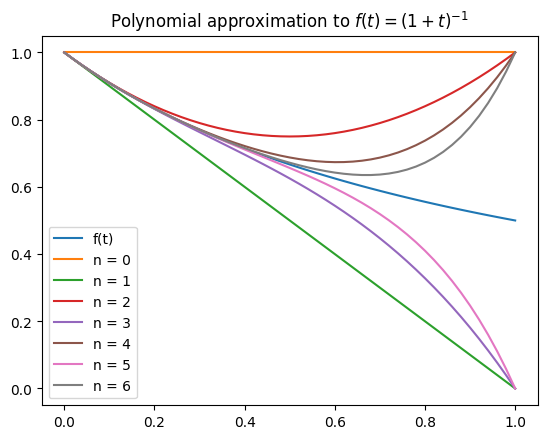

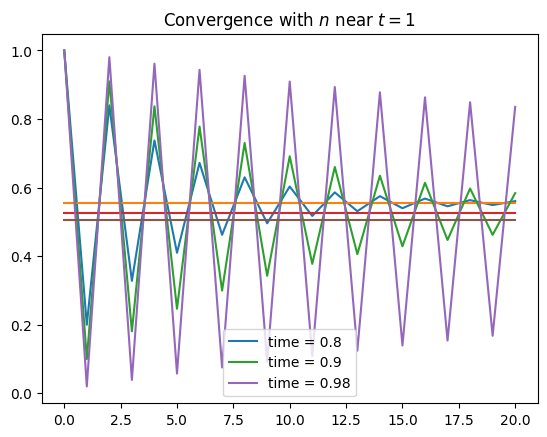

In [41]:
import numpy.polynomial as poly

nmax = 21
an = np.zeros( 21 )
for i in range(nmax):
    an[i] = (-1)**i
#We first evaluate between 0 and 1,
time = np.arange(0,1.02,0.02)
plt.plot(time,1/(1+time),label ='f(t)')
approx = np.zeros((len(time),nmax))

for n in range(nmax):
    approx[:,n] = poly.polynomial.polyval(time,an[:n+1])
                                     
for n in range(0,7):
    plt.plot(time,approx[:,n],label = 'n = '+str(n))
plt.legend()
plt.title('Polynomial approximation to $f(t) = (1+t)^{-1}$')
plt.show()

plt.figure()
time_idx = [-11,-6,-2]
for i in time_idx:
    plt.plot(approx[i,:],label = 'time = '+ str(time[i]))
    plt.plot(np.arange(0,nmax),0 * np.arange(0,nmax) + 1/(1+ time[i]))
plt.legend()
plt.title('Convergence with $n$ near $t=1$')
plt.show()


# Power series solution to ODE
We look at the solution of the ODE:

$$ \ddot y + \frac{3t}{1+t^2}\dot y + \frac{1}{1+t^2}y = 0. $$

This is the example 2 in section 8 of *Braun*.

Solving for the power series yields a recurrence relationship:
$$a_{n+2} = -\frac{n+1}{n+2} a_n$$
To initiate the series, we need to provide $a_0$ and $a_1$, which is equivalent to specifying the initial conditions 
$$y(0) = a_0$$
$$\dot y(0) = a_1$$
Let's now compute the power series and compare it to the numerical solution.

[ 0.          1.         -0.         -0.66666667  0.          0.53333333
 -0.         -0.45714286  0.          0.40634921 -0.         -0.36940837
  0.          0.34099234 -0.         -0.31825952  0.          0.29953837
 -0.         -0.28377319  0.        ]


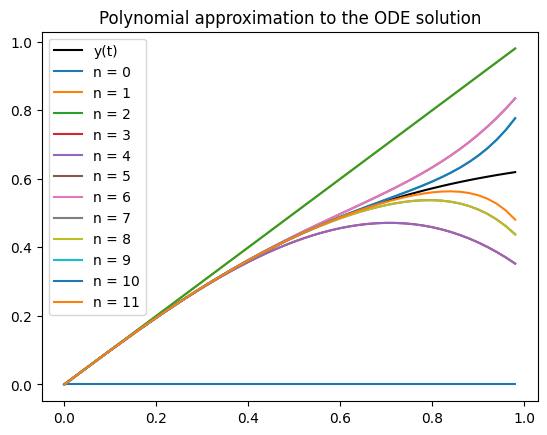

In [42]:
nmax = 21
an = np.zeros( nmax )
#set the initial conditions, and the time series
y0 = np.array((0,1))
an[0] = y0[0]
an[1] = y0[1]
#compute the coefficient in the time series
for n in range(2,nmax):
    an[n] = (-1)*(n-1)/n *an[n-2]
print(an)

time = np.arange(0,1.0,0.02)
approx = np.zeros((len(time),nmax))

#estimate the time series
for n in range(nmax):
    approx[:,n] = poly.polynomial.polyval(time,an[:n+1])

#let's integrate the ODE numerically
def rhs(y,t):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = - 3 * t / (1+t**2) * y[1] - y[0]/(1+t**2)
    return dydt

y = scipy.integrate.odeint(rhs, y0, time)

# and polt the solutions:
plt.plot(time,y[:,0],'k',label ='y(t)')
for n in range(0,12):
    plt.plot(time,approx[:,n],label = 'n = '+str(n))
plt.legend()
plt.title('Polynomial approximation to the ODE solution')
plt.show()

## Regular singular points
*Singular points* occur wherever one of the coefficient $p$ or $q$ of the ODE
$$\ddot y + p(t) \dot y + q(t) y = 0$$
blows up. We also distnguish between *regular singular points*, for which a solution can be obtained using a modifed power series, and *irregular singular points*, which are quite more messy and beyond the scope of this class.  


### Euler equation
The Euler equation is a second-order linear ODE:
$$ t^2 \ddot y + a t \dot y + b = 0.$$
It can be solved exactly, and its solution provides a good insight into how solutions of ODE have near singular points. 

To do so, we throw in the ansatz
$$y(t) = t^r$$ into the equation. This leads to a quadrative equation for r:
$$r^2 + (a-1) r + br =0$$.

### two real roots
In this case, we get two linerly independent solutions, 
$$y_1 = t^{r_1}$$
$$y_2 - t^{r_2}$$.

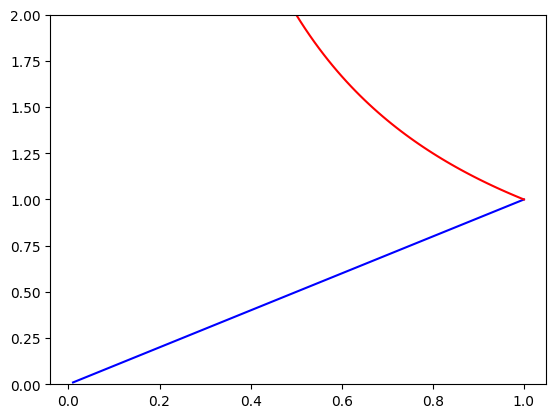

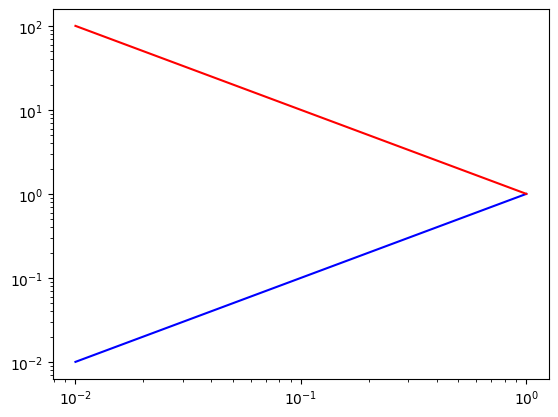

In [50]:
#let's integrate the ODE numerically
def Euler(y,t,a = 0, b = 0):
    dydt = np.zeros_like(y)
    dydt[0] = y[1]
    dydt[1] = - a * y[1]/ t - b * y[0]/(t**2)
    return dydt
time = np.arange(1.0,0.0,-0.01)
# the case a =1, b= -1 yields r_1 =1 , r_2. 
# We can get the propoer solution by carefully selecting the initial conditions
y0 = np.array((1,1))
y1 = scipy.integrate.odeint(Euler, y0, time, args = (1,-1))
y0 = np.array((1,-1))
y2 = scipy.integrate.odeint(Euler, y0, time, args = (1,-1))
plt.plot(time,y1[:,0],'b',label ='y_1(t)')
plt.plot(time,y2[:,0],'r',label ='y_2(t)')
plt.ylim(0,2)
plt.show()
plt.loglog(time,y1[:,0],'b',label ='y_1(t)')
plt.loglog(time,y2[:,0],'r',label ='y_2(t)')


### doublel roots
In this case, we get two linerly independent solutions, 
$$y_1 = t^{r}$$
$$y_2 =  t^{r}\ln(t)$$.

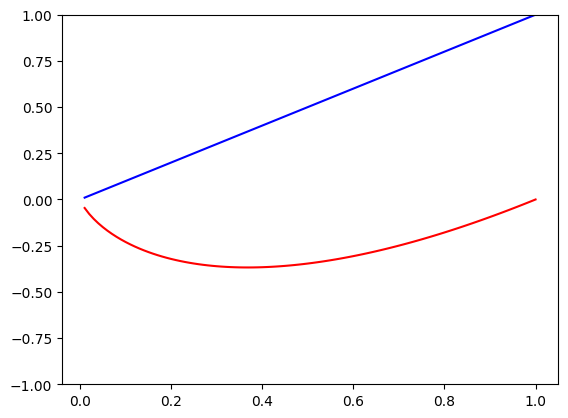

/state/partition1/job-52472049/ipykernel_366990/4228764615.py:14: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(-1,1)


(0.007943282347242082, 1)

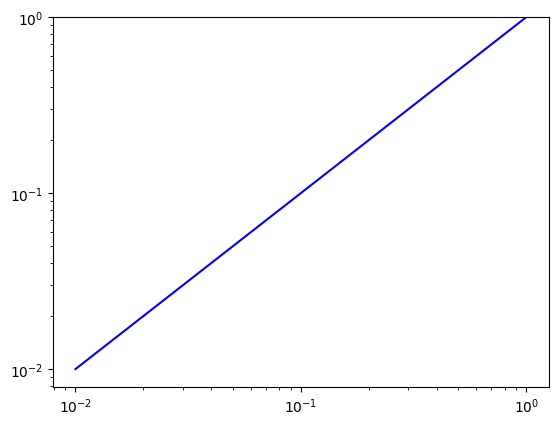

In [55]:
time = np.arange(1.0,0.0,-0.01)
# the case a = -1, b= 1 yields r_1 = r_2 = 1. 
# We can get the two solutions by carefully selecting the initial conditions
y0 = np.array((1,1))
y1 = scipy.integrate.odeint(Euler, y0, time, args = (-1,1))
y0 = np.array((0,1))
y2 = scipy.integrate.odeint(Euler, y0, time, args = (-1,1))
plt.plot(time,y1[:,0],'b',label ='y_1(t)')
plt.plot(time,y2[:,0],'r',label ='y_2(t)')
plt.ylim(-1,1)
plt.show()
